# Data wrangling project 

## Gather

This section gather the information from the 3 sources provided

In [435]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import os
import matplotlib.pyplot as plt
import time
from datetime import datetime
import re
import matplotlib.pyplot as plt
%matplotlib inline

### First file: WeRateDogs

In [5]:
#Uploading the first file from a folder in my laptop to a pandas dataframe
WeRateDogs = pd.read_csv('files/twitter-archive-enhanced.csv')
WeRateDogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Second file: Image predictions

In [6]:
#Uploading the second file programmatically from the Udacity servers

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name = 'files/'
file_name = 'files/image-predictions.csv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
r = requests.get(url, allow_redirects=True)
open(file_name, 'wb').write(r.content)
os.listdir(folder_name)

['twitter-archive-enhanced.csv',
 '.DS_Store',
 'image-predictions.csv',
 'tweet_count.csv',
 'json_info.csv',
 'image-predictions.tsv',
 'tweet_json.txt']

In [8]:
ImagePredictions = pd.read_csv('files/image-predictions.tsv', delimiter='\t')
ImagePredictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Third file: Retweets and favorites

In [9]:
#Using tweepy to gather the number of retweets and favorites from the WeRateDogs twiter webpage

# Criação do objeto API (Senhas e tokens)
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [10]:
# Criação do objeto API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit_notify=True, wait_on_rate_limit=True)

In [11]:
# Pegando tweets por ID
df_list = []
df_list_del_tweets = []
timer_sec = 0
for index, tweet_id in enumerate(WeRateDogs.tweet_id[0:]):
    try:
        start = time.time()
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        attribute = {'tweet_id':tweet_id, 
                     'retweet_count':tweet.retweet_count, 
                     'favorite_count':tweet.favorite_count,
                     'in_reply_to_status_id':tweet.in_reply_to_status_id, 
                     'in_reply_to_user_id':tweet.in_reply_to_user_id} 
        df_list.append(attribute)
        end = time.time()
        timer_sec += (end - start)
        timer_min = timer_sec/60  
        print('{0} - {1} - {2:.2f} min'.format(index+1, tweet_id, timer_min))
    except Exception as e:
        df_list_del_tweets.append(tweet_id)
        print('ID não encontrado.')

1 - 892420643555336193 - 0.00 min
2 - 892177421306343426 - 0.01 min
3 - 891815181378084864 - 0.01 min
4 - 891689557279858688 - 0.02 min
5 - 891327558926688256 - 0.02 min
6 - 891087950875897856 - 0.03 min
7 - 890971913173991426 - 0.03 min
8 - 890729181411237888 - 0.03 min
9 - 890609185150312448 - 0.04 min
10 - 890240255349198849 - 0.04 min
11 - 890006608113172480 - 0.05 min
12 - 889880896479866881 - 0.05 min
13 - 889665388333682689 - 0.06 min
14 - 889638837579907072 - 0.06 min
15 - 889531135344209921 - 0.07 min
16 - 889278841981685760 - 0.07 min
17 - 888917238123831296 - 0.08 min
18 - 888804989199671297 - 0.09 min
19 - 888554962724278272 - 0.10 min
ID não encontrado.
21 - 888078434458587136 - 0.10 min
22 - 887705289381826560 - 0.11 min
23 - 887517139158093824 - 0.11 min
24 - 887473957103951883 - 0.12 min
25 - 887343217045368832 - 0.12 min
26 - 887101392804085760 - 0.13 min
27 - 886983233522544640 - 0.13 min
28 - 886736880519319552 - 0.13 min
29 - 886680336477933568 - 0.14 min
30 - 88636

236 - 847606175596138505 - 0.98 min
237 - 847251039262605312 - 0.99 min
238 - 847157206088847362 - 0.99 min
239 - 847116187444137987 - 0.99 min
240 - 846874817362120707 - 1.00 min
241 - 846514051647705089 - 1.00 min
242 - 846505985330044928 - 1.01 min
243 - 846153765933735936 - 1.01 min
244 - 846139713627017216 - 1.02 min
245 - 846042936437604353 - 1.02 min
246 - 845812042753855489 - 1.02 min
247 - 845677943972139009 - 1.03 min
ID não encontrado.
249 - 845397057150107648 - 1.03 min
250 - 845306882940190720 - 1.04 min
251 - 845098359547420673 - 1.04 min
252 - 844979544864018432 - 1.04 min
253 - 844973813909606400 - 1.05 min
ID não encontrado.
255 - 844580511645339650 - 1.05 min
256 - 844223788422217728 - 1.06 min
257 - 843981021012017153 - 1.06 min
258 - 843856843873095681 - 1.07 min
259 - 843604394117681152 - 1.07 min
260 - 843235543001513987 - 1.07 min
ID não encontrado.
262 - 842846295480000512 - 1.08 min
263 - 842765311967449089 - 1.08 min
264 - 842535590457499648 - 1.09 min
265 - 8

466 - 817181837579653120 - 1.94 min
467 - 817171292965273600 - 1.95 min
468 - 817120970343411712 - 1.95 min
469 - 817056546584727552 - 1.95 min
470 - 816829038950027264 - 1.96 min
471 - 816816676327063552 - 1.96 min
472 - 816697700272001025 - 1.97 min
473 - 816450570814898180 - 1.97 min
474 - 816336735214911488 - 1.97 min
475 - 816091915477250048 - 1.98 min
476 - 816062466425819140 - 1.98 min
477 - 816014286006976512 - 1.99 min
478 - 815990720817401858 - 1.99 min
479 - 815966073409433600 - 2.00 min
480 - 815745968457060357 - 2.00 min
481 - 815736392542261248 - 2.00 min
482 - 815639385530101762 - 2.01 min
483 - 815390420867969024 - 2.01 min
484 - 814986499976527872 - 2.02 min
485 - 814638523311648768 - 2.02 min
486 - 814578408554463233 - 2.02 min
487 - 814530161257443328 - 2.03 min
488 - 814153002265309185 - 2.03 min
489 - 813944609378369540 - 2.04 min
490 - 813910438903693312 - 2.04 min
491 - 813812741911748608 - 2.04 min
492 - 813800681631023104 - 2.05 min
493 - 813217897535406080 - 2

695 - 786729988674449408 - 3.05 min
696 - 786709082849828864 - 3.06 min
697 - 786664955043049472 - 3.06 min
698 - 786595970293370880 - 3.06 min
699 - 786363235746385920 - 3.07 min
700 - 786286427768250368 - 3.07 min
701 - 786233965241827333 - 3.08 min
702 - 786051337297522688 - 3.08 min
703 - 786036967502913536 - 3.09 min
704 - 785927819176054784 - 3.09 min
705 - 785872687017132033 - 3.09 min
706 - 785639753186217984 - 3.10 min
707 - 785533386513321988 - 3.10 min
708 - 785515384317313025 - 3.11 min
709 - 785264754247995392 - 3.11 min
710 - 785170936622350336 - 3.11 min
711 - 784826020293709826 - 3.12 min
712 - 784517518371221505 - 3.12 min
713 - 784431430411685888 - 3.13 min
714 - 784183165795655680 - 3.13 min
715 - 784057939640352768 - 3.14 min
716 - 783839966405230592 - 3.14 min
717 - 783821107061198850 - 3.14 min
718 - 783695101801398276 - 3.15 min
719 - 783466772167098368 - 3.15 min
720 - 783391753726550016 - 3.16 min
721 - 783347506784731136 - 3.16 min
722 - 783334639985389568 - 3

Rate limit reached. Sleeping for: 655


901 - 758740312047005698 - 16.45 min
902 - 758474966123810816 - 16.45 min
903 - 758467244762497024 - 16.46 min
904 - 758405701903519748 - 16.46 min
905 - 758355060040593408 - 16.47 min
906 - 758099635764359168 - 16.48 min
907 - 758041019896193024 - 16.48 min
908 - 757741869644341248 - 16.48 min
909 - 757729163776290825 - 16.49 min
910 - 757725642876129280 - 16.49 min
911 - 757611664640446465 - 16.50 min
912 - 757597904299253760 - 16.50 min
913 - 757596066325864448 - 16.50 min
914 - 757400162377592832 - 16.51 min
915 - 757393109802180609 - 16.51 min
916 - 757354760399941633 - 16.52 min
917 - 756998049151549440 - 16.52 min
918 - 756939218950160384 - 16.53 min
919 - 756651752796094464 - 16.53 min
920 - 756526248105566208 - 16.53 min
921 - 756303284449767430 - 16.54 min
922 - 756288534030475264 - 16.54 min
923 - 756275833623502848 - 16.55 min
924 - 755955933503782912 - 16.55 min
925 - 755206590534418437 - 16.55 min
926 - 755110668769038337 - 16.56 min
927 - 754874841593970688 - 16.56 min
9

1120 - 731285275100512256 - 17.36 min
1121 - 731156023742988288 - 17.37 min
1122 - 730924654643314689 - 17.37 min
1123 - 730573383004487680 - 17.38 min
1124 - 730427201120833536 - 17.38 min
1125 - 730211855403241472 - 17.38 min
1126 - 730196704625098752 - 17.39 min
1127 - 729854734790754305 - 17.39 min
1128 - 729838605770891264 - 17.40 min
1129 - 729823566028484608 - 17.40 min
1130 - 729463711119904772 - 17.40 min
1131 - 729113531270991872 - 17.41 min
1132 - 728986383096946689 - 17.41 min
1133 - 728760639972315136 - 17.42 min
1134 - 728751179681943552 - 17.42 min
1135 - 728653952833728512 - 17.43 min
1136 - 728409960103686147 - 17.43 min
1137 - 728387165835677696 - 17.43 min
1138 - 728046963732717569 - 17.44 min
1139 - 728035342121635841 - 17.44 min
1140 - 728015554473250816 - 17.45 min
1141 - 727685679342333952 - 17.45 min
1142 - 727644517743104000 - 17.45 min
1143 - 727524757080539137 - 17.46 min
1144 - 727314416056803329 - 17.46 min
1145 - 727286334147182592 - 17.47 min
1146 - 72717

1336 - 705239209544720384 - 18.30 min
1337 - 705223444686888960 - 18.30 min
1338 - 705102439679201280 - 18.31 min
1339 - 705066031337840642 - 18.31 min
1340 - 704871453724954624 - 18.32 min
1341 - 704859558691414016 - 18.32 min
1342 - 704847917308362754 - 18.32 min
1343 - 704819833553219584 - 18.33 min
1344 - 704761120771465216 - 18.33 min
1345 - 704499785726889984 - 18.34 min
1346 - 704491224099647488 - 18.34 min
1347 - 704480331685040129 - 18.35 min
1348 - 704364645503647744 - 18.35 min
1349 - 704347321748819968 - 18.35 min
1350 - 704134088924532736 - 18.36 min
1351 - 704113298707505153 - 18.36 min
1352 - 704054845121142784 - 18.37 min
1353 - 703774238772166656 - 18.37 min
1354 - 703769065844768768 - 18.38 min
1355 - 703631701117943808 - 18.38 min
1356 - 703611486317502464 - 18.38 min
1357 - 703425003149250560 - 18.39 min
1358 - 703407252292673536 - 18.39 min
1359 - 703382836347330562 - 18.40 min
1360 - 703356393781329922 - 18.40 min
1361 - 703268521220972544 - 18.41 min
1362 - 70307

1552 - 689143371370250240 - 19.21 min
1553 - 688916208532455424 - 19.22 min
1554 - 688908934925697024 - 19.22 min
1555 - 688898160958271489 - 19.23 min
1556 - 688894073864884227 - 19.23 min
1557 - 688828561667567616 - 19.24 min
1558 - 688804835492233216 - 19.24 min
1559 - 688789766343622656 - 19.24 min
1560 - 688547210804498433 - 19.25 min
1561 - 688519176466644993 - 19.25 min
1562 - 688385280030670848 - 19.26 min
1563 - 688211956440801280 - 19.26 min
1564 - 688179443353796608 - 19.26 min
1565 - 688116655151435777 - 19.27 min
1566 - 688064179421470721 - 19.27 min
1567 - 687841446767013888 - 19.28 min
1568 - 687826841265172480 - 19.28 min
1569 - 687818504314159109 - 19.29 min
1570 - 687807801670897665 - 19.29 min
1571 - 687732144991551489 - 19.29 min
1572 - 687704180304273409 - 19.30 min
1573 - 687664829264453632 - 19.30 min
1574 - 687494652870668288 - 19.31 min
1575 - 687480748861947905 - 19.31 min
1576 - 687476254459715584 - 19.32 min
1577 - 687460506001633280 - 19.32 min
1578 - 68739

1769 - 678389028614488064 - 20.17 min
1770 - 678380236862578688 - 20.18 min
1771 - 678341075375947776 - 20.18 min
1772 - 678334497360859136 - 20.19 min
1773 - 678278586130948096 - 20.19 min
1774 - 678255464182861824 - 20.19 min
1775 - 678023323247357953 - 20.20 min
1776 - 678021115718029313 - 20.20 min
1777 - 677961670166224897 - 20.21 min
1778 - 677918531514703872 - 20.21 min
1779 - 677895101218201600 - 20.22 min
1780 - 677716515794329600 - 20.22 min
1781 - 677700003327029250 - 20.22 min
1782 - 677698403548192770 - 20.23 min
1783 - 677687604918272002 - 20.23 min
1784 - 677673981332312066 - 20.24 min
1785 - 677662372920729601 - 20.24 min
1786 - 677644091929329666 - 20.24 min
1787 - 677573743309385728 - 20.25 min
1788 - 677565715327688705 - 20.25 min
1789 - 677557565589463040 - 20.26 min
1790 - 677547928504967168 - 20.26 min
1791 - 677530072887205888 - 20.27 min
1792 - 677335745548390400 - 20.27 min
1793 - 677334615166730240 - 20.27 min
1794 - 677331501395156992 - 20.28 min
1795 - 67732

Rate limit reached. Sleeping for: 668


1801 - 676975532580409345 - 31.53 min
1802 - 676957860086095872 - 31.53 min
1803 - 676949632774234114 - 31.54 min
1804 - 676948236477857792 - 31.54 min
1805 - 676946864479084545 - 31.54 min
1806 - 676942428000112642 - 31.55 min
1807 - 676936541936185344 - 31.55 min
1808 - 676916996760600576 - 31.56 min
1809 - 676897532954456065 - 31.56 min
1810 - 676864501615042560 - 31.57 min
1811 - 676821958043033607 - 31.57 min
1812 - 676819651066732545 - 31.57 min
1813 - 676811746707918848 - 31.58 min
1814 - 676776431406465024 - 31.58 min
1815 - 676617503762681856 - 31.59 min
1816 - 676613908052996102 - 31.59 min
1817 - 676606785097199616 - 31.60 min
1818 - 676603393314578432 - 31.60 min
1819 - 676593408224403456 - 31.60 min
1820 - 676590572941893632 - 31.61 min
1821 - 676588346097852417 - 31.61 min
1822 - 676582956622721024 - 31.62 min
1823 - 676575501977128964 - 31.62 min
1824 - 676533798876651520 - 31.62 min
1825 - 676496375194980353 - 31.63 min
1826 - 676470639084101634 - 31.63 min
1827 - 67644

2017 - 672169685991993344 - 32.51 min
2018 - 672160042234327040 - 32.52 min
2019 - 672139350159835138 - 32.52 min
2020 - 672125275208069120 - 32.53 min
2021 - 672095186491711488 - 32.53 min
2022 - 672082170312290304 - 32.53 min
2023 - 672068090318987265 - 32.54 min
2024 - 671896809300709376 - 32.54 min
2025 - 671891728106971137 - 32.55 min
2026 - 671882082306625538 - 32.55 min
2027 - 671879137494245376 - 32.56 min
2028 - 671874878652489728 - 32.56 min
2029 - 671866342182637568 - 32.57 min
2030 - 671855973984772097 - 32.57 min
2031 - 671789708968640512 - 32.57 min
2032 - 671768281401958400 - 32.58 min
2033 - 671763349865160704 - 32.58 min
2034 - 671744970634719232 - 32.59 min
2035 - 671743150407421952 - 32.59 min
2036 - 671735591348891648 - 32.59 min
2037 - 671729906628341761 - 32.60 min
2038 - 671561002136281088 - 32.60 min
2039 - 671550332464455680 - 32.61 min
2040 - 671547767500775424 - 32.61 min
2041 - 671544874165002241 - 32.61 min
2042 - 671542985629241344 - 32.62 min
2043 - 67153

2233 - 668221241640230912 - 33.44 min
2234 - 668204964695683073 - 33.44 min
2235 - 668190681446379520 - 33.45 min
2236 - 668171859951755264 - 33.54 min
2237 - 668154635664932864 - 33.54 min
2238 - 668142349051129856 - 33.55 min
2239 - 668113020489474048 - 33.55 min
2240 - 667937095915278337 - 33.56 min
2241 - 667924896115245057 - 33.56 min
2242 - 667915453470232577 - 33.56 min
2243 - 667911425562669056 - 33.57 min
2244 - 667902449697558528 - 33.57 min
2245 - 667886921285246976 - 33.58 min
2246 - 667885044254572545 - 33.58 min
2247 - 667878741721415682 - 33.58 min
2248 - 667873844930215936 - 33.59 min
2249 - 667866724293877760 - 33.59 min
2250 - 667861340749471744 - 33.60 min
2251 - 667832474953625600 - 33.60 min
2252 - 667806454573760512 - 33.61 min
2253 - 667801013445750784 - 33.61 min
2254 - 667793409583771648 - 33.61 min
2255 - 667782464991965184 - 33.62 min
2256 - 667773195014021121 - 33.62 min
2257 - 667766675769573376 - 33.63 min
2258 - 667728196545200128 - 33.63 min
2259 - 66772

In [12]:
df_list

[{'tweet_id': 892420643555336193,
  'retweet_count': 8178,
  'favorite_count': 37516,
  'in_reply_to_status_id': None,
  'in_reply_to_user_id': None},
 {'tweet_id': 892177421306343426,
  'retweet_count': 6052,
  'favorite_count': 32262,
  'in_reply_to_status_id': None,
  'in_reply_to_user_id': None},
 {'tweet_id': 891815181378084864,
  'retweet_count': 4004,
  'favorite_count': 24300,
  'in_reply_to_status_id': None,
  'in_reply_to_user_id': None},
 {'tweet_id': 891689557279858688,
  'retweet_count': 8327,
  'favorite_count': 40852,
  'in_reply_to_status_id': None,
  'in_reply_to_user_id': None},
 {'tweet_id': 891327558926688256,
  'retweet_count': 9026,
  'favorite_count': 39067,
  'in_reply_to_status_id': None,
  'in_reply_to_user_id': None},
 {'tweet_id': 891087950875897856,
  'retweet_count': 2998,
  'favorite_count': 19637,
  'in_reply_to_status_id': None,
  'in_reply_to_user_id': None},
 {'tweet_id': 890971913173991426,
  'retweet_count': 1984,
  'favorite_count': 11472,
  'in_re

In [13]:
# Armazenando dados da consulta no arquivo tweet_json.txt
with open('files/tweet_json.txt', 'w') as f:
    for dic in df_list:
        tweet_json = json.dumps(dic)
        f.write(tweet_json+'\n')        

In [14]:
# Criando DataFrame no Pandas
with open('files/tweet_json.txt') as jf:
    json_list = [json.loads(line.rstrip('\n')) for line in jf]    
    Json_Info = pd.DataFrame(json_list)

In [15]:
# Salvando consulta em arquivo para evitar futuras consultas
Json_Info.to_csv('files/json_info.csv', sep=',', index=False)

## Assess

This section assess the data gathered using the concepts below.

Quality issues pertain to content. Low quality data is also known as dirty data. There are four dimensions of quality data:

Completeness: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?

Validity: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).

Accuracy: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.

Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

Tidiness issues pertain to structure. These structural problems generally prevent easy analysis. Untidy data is also known as messy data. The requirements for tidy data are:

Each variable forms a column.
Each observation forms a row.
Each type of observational unit forms a table.


In [16]:
#Comparing dataframe sizes to see if the number of rows match

print('WeRateDogs lines count = ' + str(len(WeRateDogs)))
print('ImagePredictions line count = ' + str(len(ImagePredictions)))
print('Json_Info line count = ' + str(len(Json_Info)))

WeRateDogs lines count = 2356
ImagePredictions line count = 2075
Json_Info line count = 2337


1. All three files have different row count.

In [17]:
#Checking first file fields info
WeRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
WeRateDogs.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. timestamp should be datetype datetime
3. The project specification says that just original tweets must be taking into account, therafore, the lines with values <> '' in the field retweeted_status_id must be removed.
4. The project specification also says that tweets without images shouldn't be taking into account, therafore expanded_urls without value must be removed.

In [19]:
#Checking second file fields info
ImagePredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
ImagePredictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


The only observation about this file is the structure of the prediction fields, I will go through this subject with more details in the end of the assess section.

In [21]:
Json_Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 5 columns):
favorite_count           2337 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
retweet_count            2337 non-null int64
tweet_id                 2337 non-null int64
dtypes: float64(2), int64(3)
memory usage: 91.4 KB


No visible problems with this dataframe

In [24]:
#Looking for duplicate values

print('WeRateDogs tweet_id duplicate values = ' + str(WeRateDogs.tweet_id.duplicated().sum()))
print('ImagePredictions tweet_id duplicate values = ' + str(ImagePredictions.tweet_id.duplicated().sum()))
print('Json_Info tweet_id duplicate values = ' + str(Json_Info.tweet_id.duplicated().sum()))

WeRateDogs tweet_id duplicate values = 0
ImagePredictions tweet_id duplicate values = 0
Json_Info tweet_id duplicate values = 0


No duplicated ids found.


#### WeRateDog important findings observed during visual analysis

In [362]:
len(WeRateDogs[(pd.isnull(WeRateDogs['retweeted_status_user_id'])) &
           (WeRateDogs['text'].str.contains("We only rate dogs")==True)   
            ])

48

In [363]:
WeRateDogs[(pd.isnull(WeRateDogs['retweeted_status_user_id'])) &
           (WeRateDogs['text'].str.contains("We only rate dogs")==True)   
            ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,None,None,None,None,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None
141,864873206498414592,NaN,NaN,2017-05-17 16:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864873206...,14,10,None,None,None,None,None
154,862096992088072192,NaN,NaN,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992...,13,10,None,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
221,849776966551130114,NaN,NaN,2017-04-06 00:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849776966...,12,10,None,None,None,None,None
226,848690551926992896,NaN,NaN,2017-04-03 00:16:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in animals other than dogs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848690551...,12,10,None,None,None,None,None


One of the findings observed during visual analysis is that there are 48 tweets that are not related to dogs, they are related to other animals, objects, etc. This tweets could be identified reading some samples of the 'text' field.

After some readings I could identify one key similarity between then, all them has the phrase: 'We only rate dogs', at some point of the tweet. Since this tweets are not tweets about dogs, I have decided to remove them from the analysis.

5. Remove the 48 tweets not related with dogs by using the "We only rate dogs" filter.

In [364]:
len(WeRateDogs[(pd.isnull(WeRateDogs['retweeted_status_user_id'])) &
    (WeRateDogs['text'].str.contains("We only rate dogs")==False) &  
    (WeRateDogs['name'] == 'a')])

49

After some visual analysis I could identify that the field name has 'None' values, but it also has 49 items with the letter 'a' instead of none, change the 'a'values to 'none' its a way to standardize information.

6. Replace the 49 values 'a'in the column Name to 'None', to keep the pattern when we dont have the dog name.

In [365]:
len(WeRateDogs[(pd.isnull(WeRateDogs['retweeted_status_user_id'])) &
    (WeRateDogs['text'].str.contains("We only rate dogs")==False) &  
    (WeRateDogs['rating_denominator'] != 10)]
   )

22

In [366]:
WeRateDogs[(pd.isnull(WeRateDogs['retweeted_status_user_id'])) &
    (WeRateDogs['text'].str.contains("We only rate dogs")==False) &  
    (WeRateDogs['rating_denominator'] != 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None


7. There are 22 rows with denominator different from 10, this is another pattern problem that should be fixed to better evaluate the data later.

### Quality

1. All three files have different row count.

WeRateDogs:
2. Timestamp should be datetype datetime.
3. The project specification says that just original tweets must be taking into account, therefore, the lines with values <> '' in the field retweeted_status_id must be removed.
4. The project specification also says that tweets without images shouldn't be taking into account, therefore expanded_urls without value must be removed.
5. Remove the 48 tweets not related with dogs by using the "We only rate dogs" filter.
6. Replace the 49 values 'a'in the column Name to 'None', to keep the pattern when we dont have the dog name.
7. There are 22 rows with denominator different from 10, this is another pattern problem that should be fixed to better evaluate the data later.


ImagePredictions:
8. There are predictions that are not related to dog breeds and therafore should be removed from the final analysis.

### Tidiness

WeRateDogs:

1. One variable spread in 4 columns (variable dog_stage: doggo, floofer,	pupper,	puppo).

ImagePredictions:

2. Dog prediction should be converted in one variable and therafore be presented in one column.

# Clean

This section clean the data in accordance with the problems found in the assess section and creates a final version file.

### Creating a copy of each dataframe

In [382]:
WeRateDogs_clean = WeRateDogs.copy()
ImagePredictions_clean = ImagePredictions.copy()
Json_Info_clean = Json_Info.copy()

### Quality issue 2 

#### Define
In the dataframe WeRateDogs the field 'timestamp' should be datetype datetime.

#### Code

In [383]:
WeRateDogs_clean.timestamp = pd.to_datetime(WeRateDogs_clean.timestamp)

#### Test

In [384]:
WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

In [385]:
WeRateDogs_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Quality issue 6

#### Define

In the WeRateDogs dataframe: replace the 49 values 'a' in the column Name to 'None', to keep the pattern when we dont have the dog name.

#### Code

In [386]:
WeRateDogs_clean['name'] = WeRateDogs_clean['name'].replace('a', 'None') 

#### Test

In [387]:
print('Nr of dog named a: '+ str(len(WeRateDogs_clean[WeRateDogs_clean['name'] == 'a'])))

Nr of dog named a: 0


In [388]:
WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

### Quality issue 7 

#### Define

In the WeRateDogs dataframe there are 17 rows with denominator different from 10, this is another pattern problem that should be fixed to better evaluate the data later.

For this problem I have decided that the best solution is creat a new field called dog_score, with the final score calculated by rating_numerator / rating_denominator

#### Code

In [389]:
WeRateDogs_clean['dog_score'] = WeRateDogs_clean['rating_numerator'] / WeRateDogs_clean['rating_denominator']

#### Test

In [390]:
WeRateDogs_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_score
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2


In [395]:
WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_score          

### Quality issue 9

#### Define

In the dataframe WeRateDogs there is one variable spreaded in 4 columns (variable dog_stage: doggo, floofer,	pupper,	puppo).

For this problem I have decided to create a new column called dog_stage and I will treat the cases in wich the dog has more than one stage grouping it*.

*The conditions were create based on the different cases in which more than one stage appeared in the data, it is not designed to cover all the possible cases, however I am aware that the code can be changed if there is the necessity to cover all the possibilities. 

#### Code 

In [398]:
#doggo
WeRateDogs_clean.loc[(WeRateDogs_clean['doggo'] != 'None') & (WeRateDogs_clean['floofer'] == 'None') & 
                     (WeRateDogs_clean['pupper'] == 'None') & (WeRateDogs_clean['puppo'] == 'None') 
                     , 'dog_stage'] = 'doggo'
WeRateDogs_clean.loc[(WeRateDogs_clean['doggo'] != 'None') & (WeRateDogs_clean['floofer'] != 'None') & 
                     (WeRateDogs_clean['pupper'] == 'None') & (WeRateDogs_clean['puppo'] == 'None') 
                     , 'dog_stage'] = 'doggo/floofer'
WeRateDogs_clean.loc[(WeRateDogs_clean['doggo'] != 'None') & (WeRateDogs_clean['floofer'] == 'None') & 
                     (WeRateDogs_clean['pupper'] != 'None') & (WeRateDogs_clean['puppo'] == 'None') 
                     , 'dog_stage'] = 'doggo/pupper'
WeRateDogs_clean.loc[(WeRateDogs_clean['doggo'] != 'None') & (WeRateDogs_clean['floofer'] == 'None') & 
                     (WeRateDogs_clean['pupper'] == 'None') & (WeRateDogs_clean['puppo'] != 'None') 
                     , 'dog_stage'] = 'doggo/puppo'


#floofer
WeRateDogs_clean.loc[(WeRateDogs_clean['doggo'] == 'None') & (WeRateDogs_clean['floofer'] != 'None') & 
                     (WeRateDogs_clean['pupper'] == 'None') & (WeRateDogs_clean['puppo'] == 'None') 
                     , 'dog_stage'] = 'floofer'

#pupper
WeRateDogs_clean.loc[(WeRateDogs_clean['doggo'] == 'None') & (WeRateDogs_clean['floofer'] == 'None') & 
                     (WeRateDogs_clean['pupper'] != 'None') & (WeRateDogs_clean['puppo'] == 'None') 
                     , 'dog_stage'] = 'pupper'

#puppo
WeRateDogs_clean.loc[(WeRateDogs_clean['doggo'] == 'None') & (WeRateDogs_clean['floofer'] == 'None') & 
                     (WeRateDogs_clean['pupper'] == 'None') & (WeRateDogs_clean['puppo'] != 'None') 
                     , 'dog_stage'] = 'puppo'

#None
WeRateDogs_clean.loc[(WeRateDogs_clean['doggo'] == 'None') & (WeRateDogs_clean['floofer'] == 'None') & 
                     (WeRateDogs_clean['pupper'] == 'None') & (WeRateDogs_clean['puppo'] == 'None') 
                     , 'dog_stage'] = 'None'


#### Test

In [399]:
WeRateDogs_clean.groupby('dog_stage').size()

dog_stage
None             1976
doggo              83
doggo/floofer       1
doggo/pupper       12
doggo/puppo         1
floofer             9
pupper            245
puppo              29
dtype: int64

In [400]:
WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_score          

### Quality issue 8 and tidiness issue 1

#### Define

8. In the ImagePredictions dataframe there are predictions that are not related to dog breeds and therafore should be removed from the final analysis.
1. Dog preddiction should be converted in one variable and therafore be presented in one column.

For this two issues I have decided to use the same strategy that I have used for the dog staging: the creation of a field with conditions.

The condition will verify if the prediction 1 is a dog, if not, it will check the second prediction, if the second condition is also not a dog it will check the third condition. If any of them are dogs, it will register the 'None' value.

Based on the results of the conditions, there will be final fields with the prediction and percentage of confidence.

#### Code

In [401]:
ImagePredictions_clean.loc[(ImagePredictions_clean['p1_dog'] == True)
                           , 'prediction'] = ImagePredictions_clean['p1']
ImagePredictions_clean.loc[(ImagePredictions_clean['p1_dog'] == True)
                           , 'prediction_conf'] = ImagePredictions_clean['p1_conf']

ImagePredictions_clean.loc[(ImagePredictions_clean['p1_dog'] == False) & (ImagePredictions_clean['p2_dog'] == True)
                           , 'prediction'] = ImagePredictions_clean['p2']
ImagePredictions_clean.loc[(ImagePredictions_clean['p1_dog'] == False) & (ImagePredictions_clean['p2_dog'] == True)
                           , 'prediction_conf'] = ImagePredictions_clean['p2_conf']


ImagePredictions_clean.loc[(ImagePredictions_clean['p1_dog'] == False) & (ImagePredictions_clean['p2_dog'] == False) &
                           (ImagePredictions_clean['p3_dog'] == True)
                           , 'prediction'] = ImagePredictions_clean['p3']
ImagePredictions_clean.loc[(ImagePredictions_clean['p1_dog'] == False) & (ImagePredictions_clean['p2_dog'] == False) &
                           (ImagePredictions_clean['p3_dog'] == True)
                           , 'prediction_conf'] = ImagePredictions_clean['p3_conf']

ImagePredictions_clean.loc[(ImagePredictions_clean['p1_dog'] == False) & (ImagePredictions_clean['p2_dog'] == False) &
                           (ImagePredictions_clean['p3_dog'] == False)
                           , 'prediction'] = 'None'
ImagePredictions_clean.loc[(ImagePredictions_clean['p1_dog'] == False) & (ImagePredictions_clean['p2_dog'] == False) &
                           (ImagePredictions_clean['p3_dog'] == False)
                           , 'prediction_conf'] = '0'

#### Test

In [402]:
ImagePredictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id           2075 non-null int64
jpg_url            2075 non-null object
img_num            2075 non-null int64
p1                 2075 non-null object
p1_conf            2075 non-null float64
p1_dog             2075 non-null bool
p2                 2075 non-null object
p2_conf            2075 non-null float64
p2_dog             2075 non-null bool
p3                 2075 non-null object
p3_conf            2075 non-null float64
p3_dog             2075 non-null bool
prediction         2075 non-null object
prediction_conf    2075 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 184.5+ KB


In [403]:
ImagePredictions_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,prediction_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


### Quality issues 1, 3, 4, 5

#### Define

To treat the items below, I will create a new dataframe joining the information contained in the three clean versions of the originals dataframes, this new dataframe will contain just information filtered, removing the data quoted in the items 3, 4 and 5.

Quality issues: 

1. All three files have different row count.

WeRateDogs:

3. The project specification says that just original tweets must be taking into account, therafore, the lines with values <> '' in the field retweeted_status_id must be removed.
4. The project specification also says that tweets without images shouldn't be taking into account, therafore expanded_urls without value must be removed.
5. Remove the 48 tweets not related with dogs by using the "We only rate dogs" filter.

In [404]:
#Comparing dataframe sizes before and after the filter to see if the number of rows match

print('WeRateDogs_clean lines count = ' + str(len(WeRateDogs_clean)))
print('ImagePredictions_clean line count = ' + str(len(ImagePredictions_clean)))
print('Json_Info_clean line count = ' + str(len(Json_Info_clean)))

WeRateDogs_clean lines count = 2356
ImagePredictions_clean line count = 2075
Json_Info_clean line count = 2337


As we can observe in the coutings above, even after the cleaning, the number of rows in each dataframe is different.
Having it in mind I will use the dataframe WeRateDogs as a base to the new dataframe, however, just tweets that exist in the three dataframes will be maintained.

This new dataframe will solve the problems 1, 2, 3 and 5.

#### Code

##### Creating the final dataframe

In [405]:
WeRateDogs2 = pd.merge(WeRateDogs_clean, Json_Info_clean, on='tweet_id')
len(WeRateDogs2)

2337

In [406]:
WeRateDogs3 = pd.merge(WeRateDogs2, ImagePredictions_clean, on='tweet_id')
len(WeRateDogs3)

2065

In [409]:
WeRateDogsFinal = WeRateDogs3.drop(['in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'retweeted_status_id',
                                    'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_numerator',
                                    'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 
                                    'in_reply_to_status_id_y', 'in_reply_to_user_id_y', 'p1', 'p2', 'p3',
                                    'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'
                                   ], axis=1)
len(WeRateDogsFinal)

2065

In [410]:
#Converting the column prediction_conf to float to be used during the analysis
WeRateDogsFinal['prediction_conf'] = WeRateDogsFinal['prediction_conf'].astype('float')

In [413]:
# Salvando o dataframe final em arquivo csv
WeRateDogsFinal.to_csv('files/ twitter_archive_master.csv', sep=',', index=False)

#### Test

In [414]:
len(WeRateDogsFinal)

2065

In [415]:
WeRateDogsFinal

,tweet_id,timestamp,source,text,expanded_urls,name,dog_score,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction,prediction_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,37516,8178,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,32262,6052,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,24300,4004,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,40852,8327,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,39067,9026,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,1.3,None,19637,2998,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,1.3,None,11472,1984,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,1.3,None,63292,18169,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,1.3,None,27000,4116,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,1.4,doggo,30935,7105,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319


In [416]:
WeRateDogsFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 14 columns):
tweet_id           2065 non-null int64
timestamp          2065 non-null datetime64[ns, UTC]
source             2065 non-null object
text               2065 non-null object
expanded_urls      2065 non-null object
name               2065 non-null object
dog_score          2065 non-null float64
dog_stage          2065 non-null object
favorite_count     2065 non-null int64
retweet_count      2065 non-null int64
jpg_url            2065 non-null object
img_num            2065 non-null int64
prediction         2065 non-null object
prediction_conf    2065 non-null float64
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(7)
memory usage: 242.0+ KB


# Analyse

This section is about analysing the final stage of data after the three steps of data wrangling (Gather, assess, clean).

An important thing to notice is that we don't have the complete information to all the tweets of the page WeRateDogs, this page has more than 5000 tweets. It is also important take into account that we are assessing just the main tweets and not considering retweets, tweets without images and tweets that are not related to dogs.

In a universe of more than 5000 tweets, we are analyzing 2064, which means that our analysis  correspond to a sample of more or less 40% of the universe.

In [421]:
WeRateDogsFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 14 columns):
tweet_id           2065 non-null int64
timestamp          2065 non-null datetime64[ns, UTC]
source             2065 non-null object
text               2065 non-null object
expanded_urls      2065 non-null object
name               2065 non-null object
dog_score          2065 non-null float64
dog_stage          2065 non-null object
favorite_count     2065 non-null int64
retweet_count      2065 non-null int64
jpg_url            2065 non-null object
img_num            2065 non-null int64
prediction         2065 non-null object
prediction_conf    2065 non-null float64
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(7)
memory usage: 242.0+ KB


In [422]:
WeRateDogsFinal.head(10)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_score,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction,prediction_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,37516,8178,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,32262,6052,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,24300,4004,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,40852,8327,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,39067,9026,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,1.3,None,19637,2998,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,1.3,None,11472,1984,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,1.3,None,63292,18169,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,1.3,None,27000,4116,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,1.4,doggo,30935,7105,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319


### Dog stage

As we can observe in the two analysis below, the majority of the tweets didn't staged the dogs.
84% of the tweets are related to non staged dogs.

Looking to the rest of the analysis, the other majority of tweets staged the dogs as puppers, it is a relevant number of puppers because in a remaining 15% of the data, 10% is staged as pupper and other 0.4 as doggo/pupper.

The other categories represent less than 5% of the universe making the pupper the favorite stage classification.

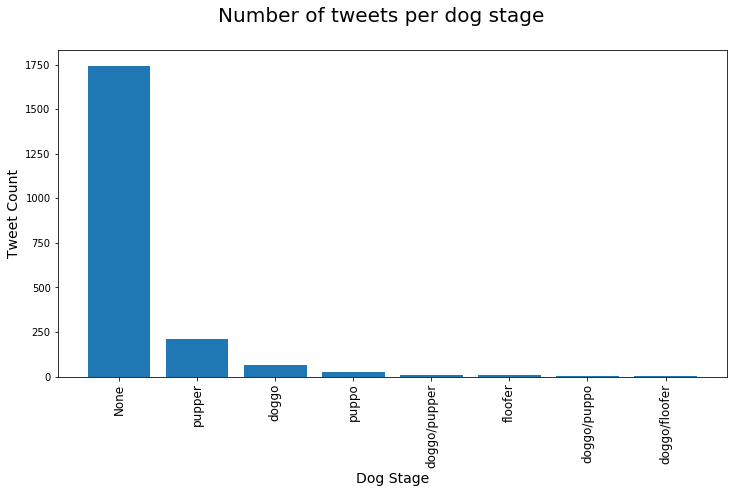

In [508]:
#Number of tweets per dog stage
#WeRateDogsFinal['dog_stage'].value_counts()[:10].plot(x='Dog stage', y='Count of tweets', kind='bar', 
 #                                                     title='Number of tweets per dog stage', legend='true')
def plot_tweets_per_dog_stage():

    count_ds = WeRateDogsFinal['dog_stage'].value_counts()[0:8].sort_values(axis=0, ascending=False)
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    fig.suptitle('Number of tweets per dog stage', fontsize=20)

    x = count_ds.index    
    y = count_ds.values
    
    plt.bar(x, y)
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=10)
    plt.xlabel('Dog Stage', fontsize=14)
    plt.ylabel('Tweet Count', fontsize=14)


plot_tweets_per_dog_stage();


In [493]:
#Percentage of tweets per dog stage
(WeRateDogsFinal['dog_stage'].value_counts()/WeRateDogsFinal['dog_stage'].count())*100

None             84.455206
pupper           10.217918
doggo             3.244552
puppo             1.113801
doggo/pupper      0.532688
floofer           0.338983
doggo/floofer     0.048426
doggo/puppo       0.048426
Name: dog_stage, dtype: float64

### Dog predicted breed

I would like to start this analysis looking to the level of confidence in the predictions.

As we can see in the numbers below, less than 50% of the breed predictions have a confidence level equal or higher than 50%. 

With this information in mind, I will proceed the breed analysis ignoring the confidence level.

In [425]:
print('Nr of tweets in the final file: ' + str(len(WeRateDogsFinal)))
print('Nr of tweets with prediction conf higher than 0.49: ' + 
          str(len(WeRateDogsFinal[WeRateDogsFinal['prediction_conf'] >= 0.500000])))
print('Percentage of tweets with prediction conf higher than 0.49: ' + 
          str(len(WeRateDogsFinal[WeRateDogsFinal['prediction_conf'] >= 0.500000]) / len(WeRateDogsFinal)))

Nr of tweets in the final file: 2065
Nr of tweets with prediction conf higher than 0.49: 966
Percentage of tweets with prediction conf higher than 0.49: 0.46779661016949153


#### Count of tweets per dog breed analysis:

Here we also have a considerable number of predictions defined as 'None', repeating what we saw in the dog stage analysis, however, at this time the number is less considerable, representing just 16% of the tweets.

The rest of the tweets are very well divided between different breeds, however, we have 8 breeds that may be considered relevant in this analysis, taking a special attention to the Golden Retriever breed that alone represents 8% of the tweets.

We definitely have a favorite breed along the users of the page, congratulations to all the cute Golden Retrievers out there.

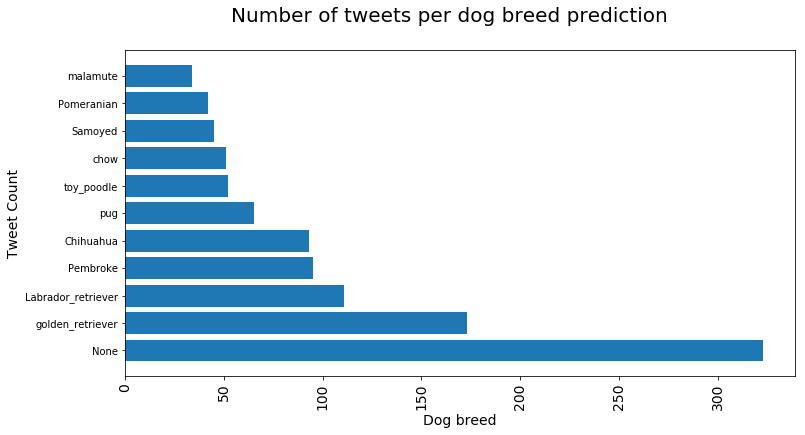

In [509]:
def plot_tweets_per_dog_breed():

    count_ds = WeRateDogsFinal['prediction'].value_counts()[0:11].sort_values(axis=0, ascending=False)

    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    fig.suptitle('Number of tweets per dog breed prediction', fontsize=20)

    x = count_ds.values
    y = count_ds.index    
    
    plt.barh(y, x) 

    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=10)
    plt.xlabel('Dog breed', fontsize=14)
    plt.ylabel('Tweet Count', fontsize=14)


plot_tweets_per_dog_breed();


In [427]:
#Percentage of tweets per dog breed prediction
(WeRateDogsFinal['prediction'].value_counts()/WeRateDogsFinal['dog_stage'].count())*100

None                           15.641646
golden_retriever                8.377724
Labrador_retriever              5.375303
Pembroke                        4.600484
Chihuahua                       4.503632
pug                             3.147700
toy_poodle                      2.518160
chow                            2.469734
Samoyed                         2.179177
Pomeranian                      2.033898
malamute                        1.646489
cocker_spaniel                  1.598063
Chesapeake_Bay_retriever        1.501211
French_bulldog                  1.452785
miniature_pinscher              1.259080
Cardigan                        1.113801
Eskimo_dog                      1.065375
Staffordshire_bullterrier       1.065375
beagle                          1.016949
German_shepherd                 1.016949
Shih-Tzu                        0.968523
Siberian_husky                  0.968523
Lakeland_terrier                0.920097
Maltese_dog                     0.920097
Rottweiler      

#### Average of confidence in the predictions per dog breed

We can see in the graph below that the most popular dog breeds also have a considerable high level of confidence in the predictions related to them which make the classification a bit more accurated.

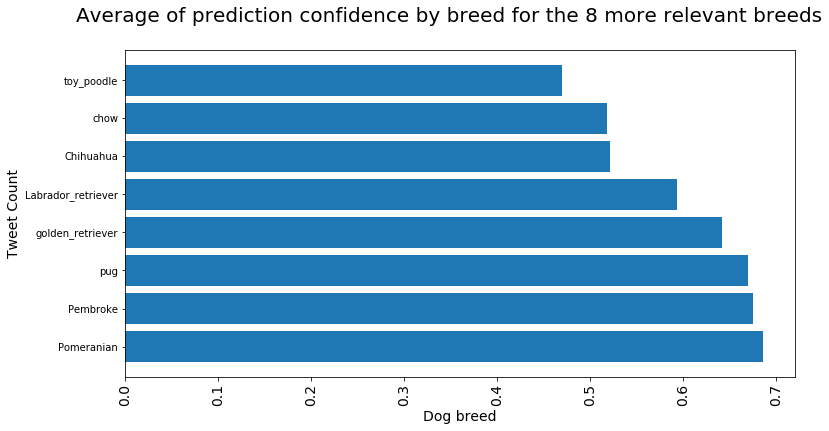

In [511]:
def plot_conf_per_breed():

    count_ds = WeRateDogsFinal.loc[
    (WeRateDogsFinal['prediction'] == 'golden_retriever') | (WeRateDogsFinal['prediction'] == 'Labrador_retriever') |
    (WeRateDogsFinal['prediction'] == 'Pembroke') | (WeRateDogsFinal['prediction'] == 'Chihuahua') |
    (WeRateDogsFinal['prediction'] == 'pug') | (WeRateDogsFinal['prediction'] == 'toy_poodle') |
    (WeRateDogsFinal['prediction'] == 'chow') | (WeRateDogsFinal['prediction'] == 'Pomeranian')
    ].groupby('prediction')['prediction_conf'].mean().sort_values(axis=0, ascending=False)

    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    fig.suptitle('Average of prediction confidence by breed for the 8 more relevant breeds', fontsize=20)

    x = count_ds.values
    y = count_ds.index    
    
    plt.barh(y, x) 

    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=10)
    plt.xlabel('Dog breed', fontsize=14)
    plt.ylabel('Tweet Count', fontsize=14)


plot_conf_per_breed();

In [460]:
WeRateDogsFinal.loc[
    (WeRateDogsFinal['prediction'] == 'golden_retriever') | (WeRateDogsFinal['prediction'] == 'Labrador_retriever') |
    (WeRateDogsFinal['prediction'] == 'Pembroke') | (WeRateDogsFinal['prediction'] == 'Chihuahua') |
    (WeRateDogsFinal['prediction'] == 'pug') | (WeRateDogsFinal['prediction'] == 'toy_poodle') |
    (WeRateDogsFinal['prediction'] == 'chow') | (WeRateDogsFinal['prediction'] == 'Pomeranian')
    ].groupby('prediction')['prediction_conf'].mean().sort_values(ascending=False)

prediction
Pomeranian            0.686306
Pembroke              0.675733
pug                   0.670693
golden_retriever      0.642582
Labrador_retriever    0.593389
Chihuahua             0.522124
chow                  0.518197
toy_poodle            0.469893
Name: prediction_conf, dtype: float64

#### Top rated breeds

Comparing the top rated breeds with the most tweeted breeds we can see that they are not strongly related.

The maximum mean for a dog breed is 2.7, scored by the breed clumber, folowed by more estable means that are stated between 1.6 and 1.12. 

Our 8 most popular dog breeds have a range between 1.2 and 1.03 which is not far away from the more stable means.

If we look to the maximum score of our 8 most popular breeds we will see that Pomeranian has an impressive maximum score of 7.5, followed by our favorite golden_retriever that has 3.4.

In [430]:
#Mean of score by breed
WeRateDogsFinal.groupby('prediction')['dog_score'].mean().sort_values(ascending=False)

prediction
clumber                        2.700000
None                           1.586378
Bouvier_des_Flandres           1.300000
Saluki                         1.250000
Pomeranian                     1.247619
Tibetan_mastiff                1.240000
briard                         1.233333
Border_terrier                 1.214286
silky_terrier                  1.200000
standard_schnauzer             1.200000
Irish_setter                   1.183333
Samoyed                        1.175556
Gordon_setter                  1.175000
golden_retriever               1.168478
kuvasz                         1.163158
Australian_terrier             1.150000
giant_schnauzer                1.150000
wire-haired_fox_terrier        1.150000
Great_Pyrenees                 1.146667
chow                           1.145098
Norfolk_terrier                1.142857
cocker_spaniel                 1.142424
Pembroke                       1.141053
Eskimo_dog                     1.140909
Doberman                     

In [431]:
#Mean of score by breed for the 8 most popular breeds
WeRateDogsFinal.loc[
    (WeRateDogsFinal['prediction'] == 'golden_retriever') | (WeRateDogsFinal['prediction'] == 'Labrador_retriever') |
    (WeRateDogsFinal['prediction'] == 'Pembroke') | (WeRateDogsFinal['prediction'] == 'Chihuahua') |
    (WeRateDogsFinal['prediction'] == 'pug') | (WeRateDogsFinal['prediction'] == 'toy_poodle') |
    (WeRateDogsFinal['prediction'] == 'chow') | (WeRateDogsFinal['prediction'] == 'Pomeranian')
    ].groupby('prediction')['dog_score'].mean().sort_values(ascending=False)

prediction
Pomeranian            1.247619
golden_retriever      1.168478
chow                  1.145098
Pembroke              1.141053
Labrador_retriever    1.116216
toy_poodle            1.105769
Chihuahua             1.055230
pug                   1.030769
Name: dog_score, dtype: float64

In [432]:
#Maximum score for the most popular breeds
WeRateDogsFinal.loc[
    (WeRateDogsFinal['prediction'] == 'golden_retriever') | (WeRateDogsFinal['prediction'] == 'Labrador_retriever') |
    (WeRateDogsFinal['prediction'] == 'Pembroke') | (WeRateDogsFinal['prediction'] == 'Chihuahua') |
    (WeRateDogsFinal['prediction'] == 'pug') | (WeRateDogsFinal['prediction'] == 'toy_poodle') |
    (WeRateDogsFinal['prediction'] == 'chow') | (WeRateDogsFinal['prediction'] == 'Pomeranian')
    ].groupby('prediction')['dog_score'].max().sort_values(ascending=False)

prediction
Pomeranian            7.500000
golden_retriever      3.428571
Pembroke              1.400000
Labrador_retriever    1.400000
Chihuahua             1.400000
toy_poodle            1.300000
pug                   1.300000
chow                  1.300000
Name: dog_score, dtype: float64

## Top rated 

To conclude, lets have a look and the top 15 rated tweets and for this analysis I have removed predictions with less than 0.5 of confidence and maintained dog breeds different than 'None'.

And there he is again, the tweet with higher score is related to our loved golden_retriever, making this breed not only the most tweeted but also the first one in our dog_score.

In [433]:
#Tweet with the higher score
WeRateDogsFinal.loc[
    (WeRateDogsFinal['prediction'] != 'None') & 
    (WeRateDogsFinal['prediction_conf'] >= 0.5)].groupby(['tweet_id', 'prediction', 'dog_stage', 'prediction_conf']
                       )['dog_score'].max().sort_values(ascending=False)[:15]

tweet_id            prediction               dog_stage  prediction_conf
810984652412424192  golden_retriever         None       0.871342           3.428571
778027034220126208  clumber                  pupper     0.946718           2.700000
774314403806253056  Eskimo_dog               None       0.596045           1.400000
807621403335917568  golden_retriever         pupper     0.873233           1.400000
854120357044912130  black-and-tan_coonhound  pupper     0.854861           1.400000
831911600680497154  bloodhound               None       0.777562           1.400000
825535076884762624  Rottweiler               puppo      0.681495           1.400000
822462944365645825  Pomeranian               pupper     0.960199           1.400000
878057613040115712  French_bulldog           None       0.839097           1.400000
821407182352777218  Irish_setter             doggo      0.505496           1.400000
820314633777061888  Gordon_setter            None       0.940724           1.400000
7784